concat-ea-append_comments-mvt-fe-enc-prepro-split-model

In [1]:
!ls *.csv

SampleSubmission_TmnO39y.csv  Test_u94Q5KV.csv	  Train_UWu5bXk.csv
test_modified.csv	      train_modified.csv


In [2]:
import pandas as pd
import numpy as np
np.random.seed(24)
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# os.chdir(os.getcwd())
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')
submission = pd.read_csv('SampleSubmission_TmnO39y.csv')

In [4]:
train.shape, test.shape, submission.shape

((8523, 12), (5681, 11), (5681, 3))

In [5]:
# comibne train and test data
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [6]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [7]:
# check data type of columns
dtype_df = data.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,1
1,float64,4
2,object,8


In [8]:
print(data.select_dtypes(include=[np.int64]).columns)
print(data.select_dtypes(include=[np.float64]).columns)
print(data.select_dtypes(include=[np.object]).columns)

Index(['Outlet_Establishment_Year'], dtype='object')
Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')
Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source'],
      dtype='object')


In [9]:
unique_count = data.apply(lambda x: len(x.unique())).reset_index()
unique_count.columns = ['column_name', 'unique_values']
unique_count = unique_count.sort_values(by='unique_values', ascending=False)
unique_count

,column_name,unique_values
3,Item_Visibility,13006
5,Item_MRP,8052
11,Item_Outlet_Sales,3494
0,Item_Identifier,1559
1,Item_Weight,416
4,Item_Type,16
6,Outlet_Identifier,10
7,Outlet_Establishment_Year,9
2,Item_Fat_Content,5
8,Outlet_Size,4


### Let's start EDA
| Univariate | Bivariate |
|-|-|
| <ol><li style="font-weight: bold; color:blue;">Target</li><li>Numerical</li><li>Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li>Target Vs Categorical</li><li>Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

In [10]:
numerical_comments = []
categorical_comments = []
cat_num_comments = []

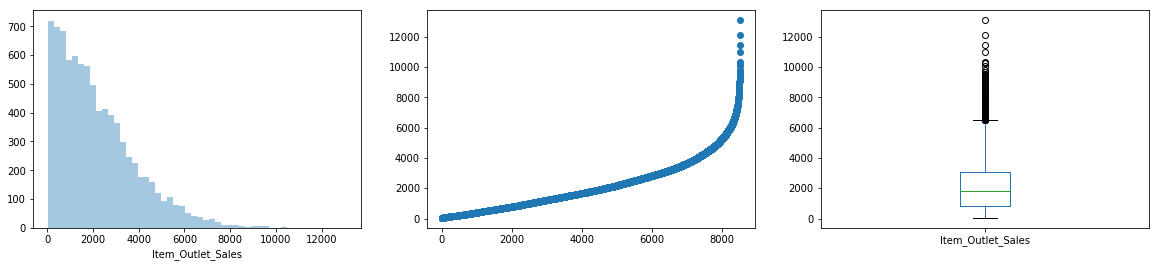

In [11]:
# Target ( Item_Outlet_Sales ) is a numerical variable
def plot_num(df, col, bins=50, log=False):
    
    if log==True:
        plt.figure(1, figsize=(20,4))
        plt.subplot(131)
        sns.distplot(np.log(df[col].dropna()), bins=bins, kde=False)

        plt.subplot(132)
        plt.scatter(range(df.shape[0]), np.sort(np.log(df[col].values)))

        plt.subplot(133)
        np.log(df[col]).plot.box()

        plt.show()
        
    else:
        plt.figure(1, figsize=(20,4))
        plt.subplot(131)
        sns.distplot(df[col].dropna(), bins=bins, kde=False)

        plt.subplot(132)
        plt.scatter(range(df.shape[0]), np.sort(df[col].values))

        plt.subplot(133)
        df[col].plot.box()

        plt.show()

plot_num(train, 'Item_Outlet_Sales')

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li style="font-weight: bold; color:blue;">Numerical</li><li>Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li>Target Vs Categorical</li><li>Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

In [12]:
numerical_comments.append('Item_Outlet_Sales has outliers. Needs transformation')

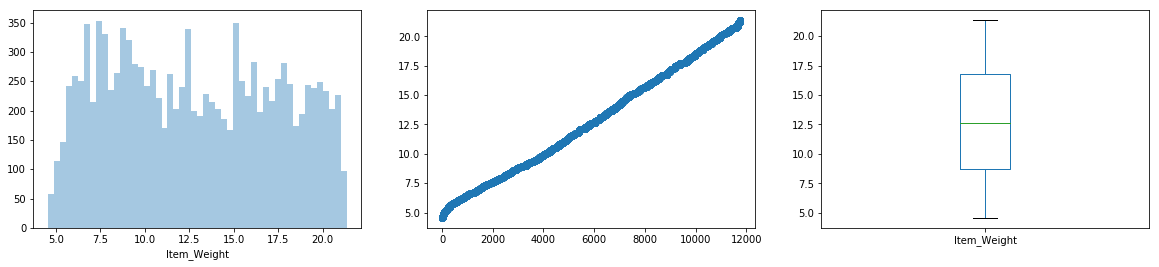

In [13]:
plot_num(data, 'Item_Weight')

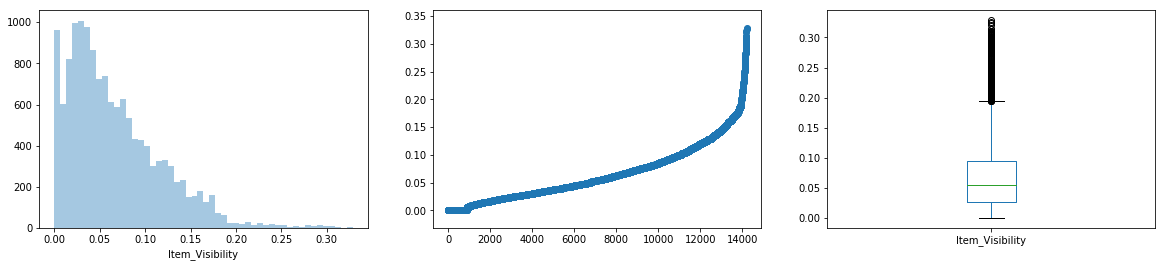

In [14]:
plot_num(data, 'Item_Visibility')

In [15]:
numerical_comments.append('Some rows have Item_Visibility = 0 and outliers too. Both need work')

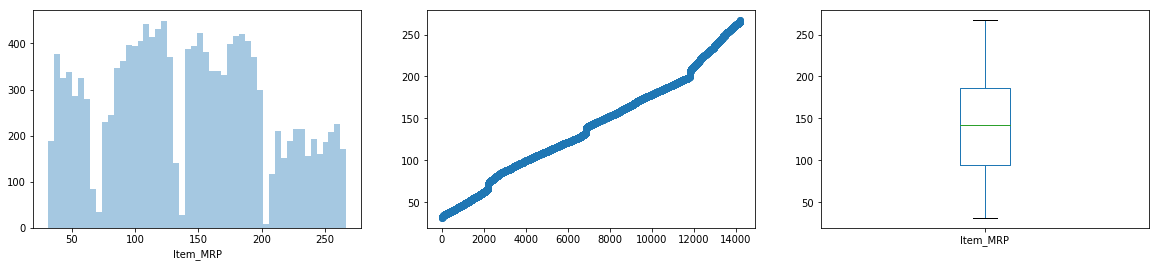

In [16]:
plot_num(data, 'Item_MRP')

In [17]:
numerical_comments.append('We see Item_MRP data roughly grouped into 4 bins')

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li>Numerical</li><li style="font-weight: bold; color:blue;">Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li>Target Vs Categorical</li><li>Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

In [18]:
numerical_comments

['Item_Outlet_Sales has outliers. Needs transformation',
 'Some rows have Item_Visibility = 0 and outliers too. Both need work',
 'We see Item_MRP data roughly grouped into 4 bins']

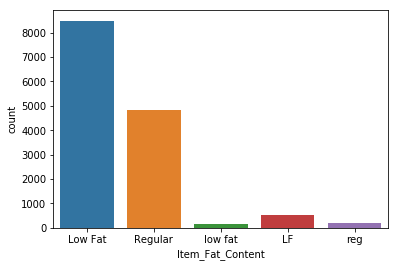

In [19]:
# Item_Fat_Content
sns.countplot(data.Item_Fat_Content.fillna('--EMPTY--'));

- Some corrections need to be done immediately without waiting for Feature Engineering or preprocessing stage. Item_Fat_Content is the one.

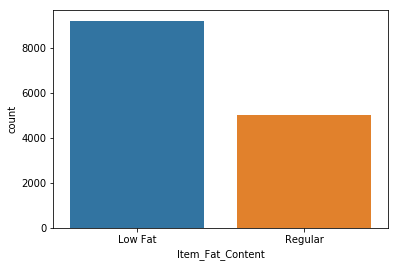

In [20]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'low fat': 'Low Fat',
                                                             'LF':'Low Fat',
                                                             'reg':'Regular'})
sns.countplot(data.Item_Fat_Content.fillna('--EMPTY--'));

- remove the last comment from categorical_comments as we have corrected it

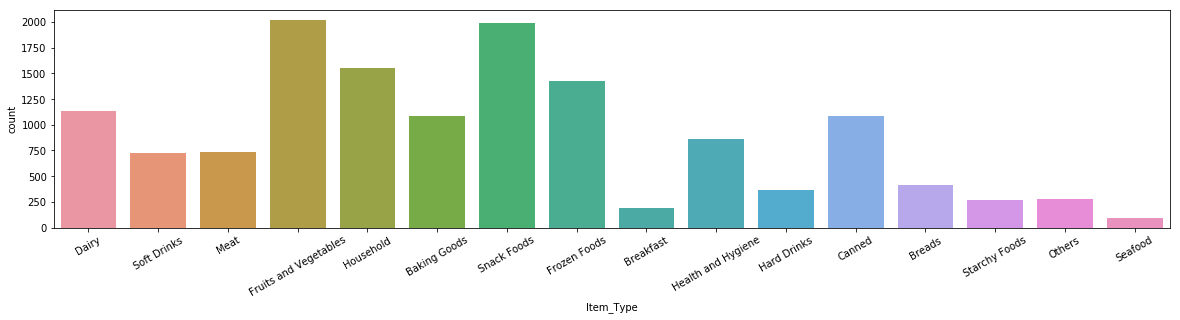

In [21]:
# Item_Type
plt.figure(figsize=(20,4))
sns.countplot(data.Item_Type)
plt.xticks(rotation=30);

In [22]:
categorical_comments.append('We may reduce no. of categories after complete EDA')

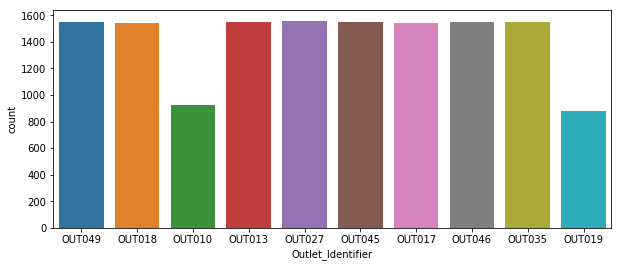

In [23]:
# Outlet_Identifier
plt.figure(figsize=(10,4))
ax = sns.countplot(data.Outlet_Identifier);

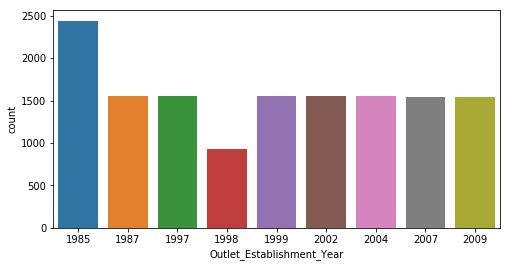

In [24]:
# Outlet_Establishment_Year
plt.figure(figsize=(8,4))
ax = sns.countplot(data.Outlet_Establishment_Year);

In [25]:
categorical_comments.append('We may convert Outlet_Establishment_Year(1985-2002) into no. of years till 2013')

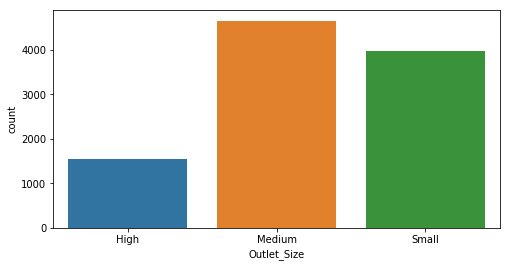

In [26]:
# Outlet_Size
plt.figure(figsize=(8,4))
ax = sns.countplot(data.Outlet_Size.sort_values());

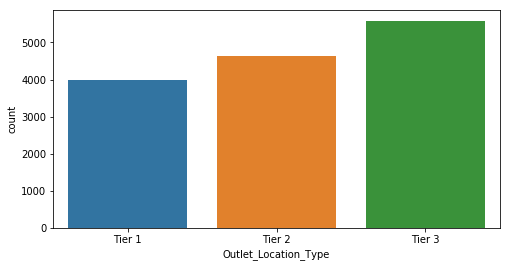

In [27]:
# Outlet_Location_Type
plt.figure(figsize=(8,4))
ax = sns.countplot(data.Outlet_Location_Type.sort_values());

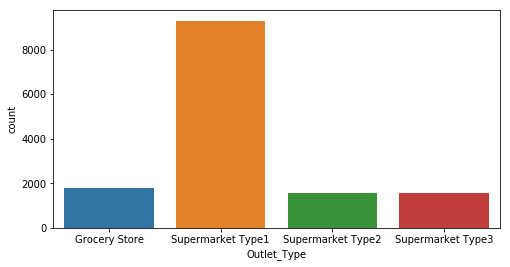

In [28]:
# Outlet_Type
plt.figure(figsize=(8,4))
ax = sns.countplot(data.Outlet_Type.sort_values());

In [29]:
categorical_comments.append('Supermarket Type 1 has arbitrary high frequency in Outlet_Type')

<b> Count missing values

In [30]:
# count missing values
def count_missing(df):
    missing_df = df.isnull().sum().reset_index()
    missing_df.columns = ['column_name', 'missing_count']
    missing_df = missing_df[missing_df['missing_count']>0]
    missing_df = missing_df.sort_values(by='missing_count')
    return missing_df

count_missing(data)

,column_name,missing_count
1,Item_Weight,2439
8,Outlet_Size,4016
11,Item_Outlet_Sales,5681


In [31]:
numerical_comments.append('Item_Weight has missing values')
categorical_comments.append('Outlet_Size has missing values')

In [32]:
from pprint import pprint
def print_Comments():
    print("--------------------------NUMERICAL COMMENTS--------------------------\n")
    pprint(numerical_comments)
    print("\n--------------------------CATEGORICAL COMMENTS--------------------------\n")
    pprint(categorical_comments)
    print("\n--------------------------CAT + NUM COMMENTS--------------------------\n")
    pprint(cat_num_comments)

print_Comments()

--------------------------NUMERICAL COMMENTS--------------------------

['Item_Outlet_Sales has outliers. Needs transformation',
 'Some rows have Item_Visibility = 0 and outliers too. Both need work',
 'We see Item_MRP data roughly grouped into 4 bins',
 'Item_Weight has missing values']

--------------------------CATEGORICAL COMMENTS--------------------------

['We may reduce no. of categories after complete EDA',
 'We may convert Outlet_Establishment_Year(1985-2002) into no. of years till '
 '2013',
 'Supermarket Type 1 has arbitrary high frequency in Outlet_Type',
 'Outlet_Size has missing values']

--------------------------CAT + NUM COMMENTS--------------------------

[]


We will keep above comments in consideration during bivariate EDA.

We will make use of scatter plots for the numeric variables and violin plots for the categorical variables.

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li>Numerical</li><li>Categorical</li></ol> | <ol><li style="font-weight: bold; color:blue;">Target Vs Numerical</li><li>Target Vs Categorical</li><li>Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

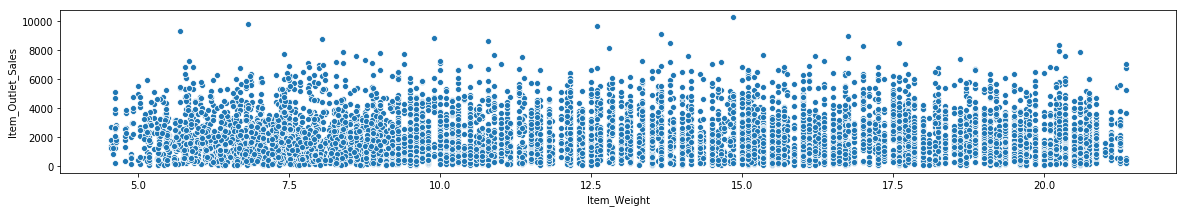

In [33]:
# target Vs Item_Weight
plt.figure(figsize=(20,3))
sns.scatterplot(data['Item_Weight'], data['Item_Outlet_Sales']);

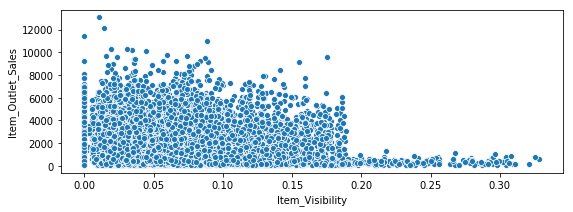

In [34]:
# target Vs Item_Visibility
plt.figure(figsize=(9,3))
sns.scatterplot(data['Item_Visibility'], data['Item_Outlet_Sales']);

In [35]:
numerical_comments.append('The zero visibility items too have sales. This concern has been pointed out in numerical EDA ')

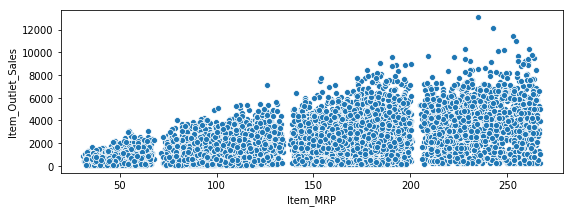

In [36]:
# target Vs Item_MRP
plt.figure(figsize=(9,3))
sns.scatterplot(data['Item_MRP'], data['Item_Outlet_Sales']);

We will make use of scatter plots for the numeric variables and violin plots for the categorical variables.

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li>Numerical</li><li>Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li style="font-weight: bold; color:blue;">Target Vs Categorical</li><li>Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

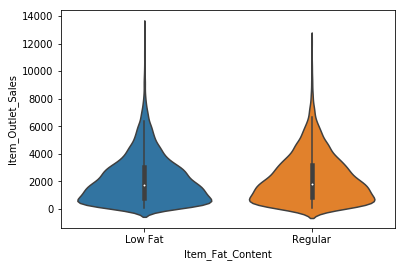

In [37]:
# Vs Item_Fat_Content
# plt.figure(figsize=(6,4))
sns.violinplot(data["Item_Fat_Content"].fillna('--EMPTY--'), data["Item_Outlet_Sales"]);

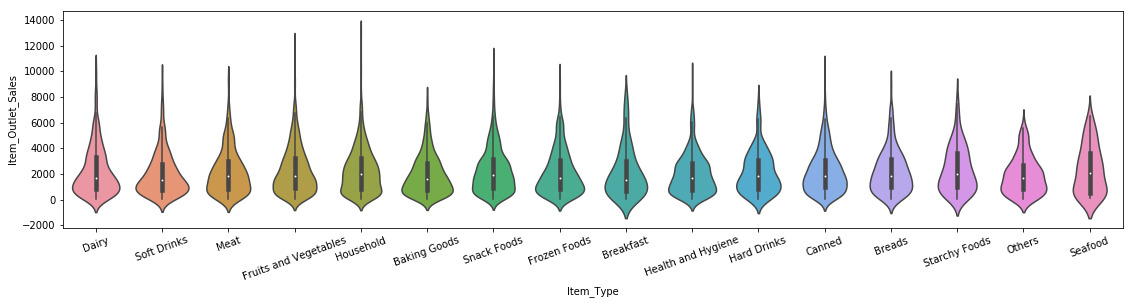

In [38]:
# Vs Item_Type
plt.figure(figsize=(19,4))
sns.violinplot(data["Item_Type"], data["Item_Outlet_Sales"])
plt.xticks(rotation=20);

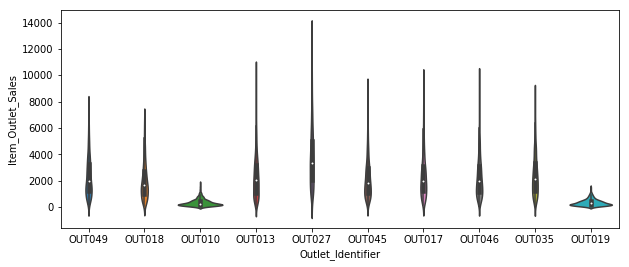

In [39]:
# Vs Outlet_Identifier
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Identifier"], data["Item_Outlet_Sales"]);

In [40]:
categorical_comments.append('Outlet_Identifier OUT010 and OUT019 are moe spread near about 250,\
rest all have even distribution with Item_Output_Sales')

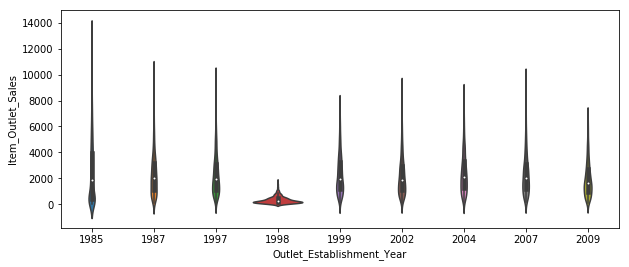

In [41]:
# Vs Outlet_Establishment_Year
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Establishment_Year"], data["Item_Outlet_Sales"]);

Outlet_Establishment_Year has we will convert this into number of years instead of establishment year

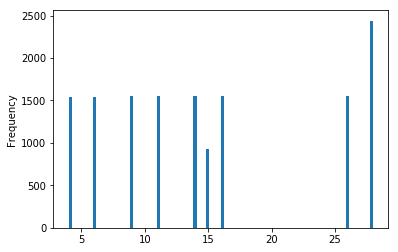

In [42]:
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Age'].plot.hist(bins=100);

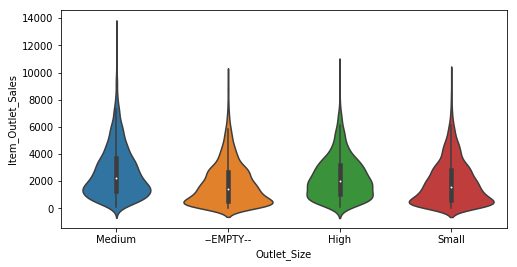

In [43]:
# Vs Outlet_Size
plt.figure(figsize=(8,4))
sns.violinplot(data["Outlet_Size"].fillna('--EMPTY--'), data["Item_Outlet_Sales"]);

In [44]:
categorical_comments.append("Empty values have same distribution as 'Small' has")

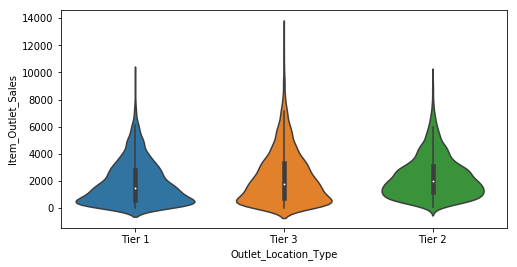

In [45]:
# Vs Outlet_Location_Type
plt.figure(figsize=(8,4))
sns.violinplot(data["Outlet_Location_Type"].fillna('--EMPTY--'), data["Item_Outlet_Sales"]);

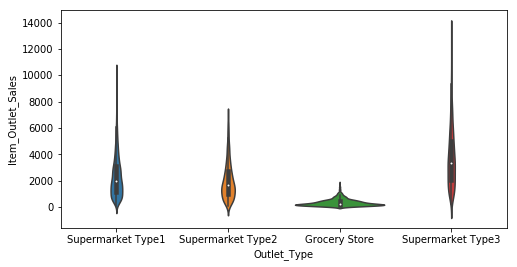

In [46]:
# Vs Outlet_Type
plt.figure(figsize=(8,4))
sns.violinplot(data["Outlet_Type"].fillna('--EMPTY--'), data["Item_Outlet_Sales"]);

We will make use of scatter plots for the numeric variables and violin plots for the categorical variables.

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li>Numerical</li><li>Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li>Target Vs Categorical</li><li style="font-weight: bold; color:blue;">Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

/home/petrichor/DS/V_enV/lib/python3.5/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/petrichor/DS/V_enV/lib/python3.5/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


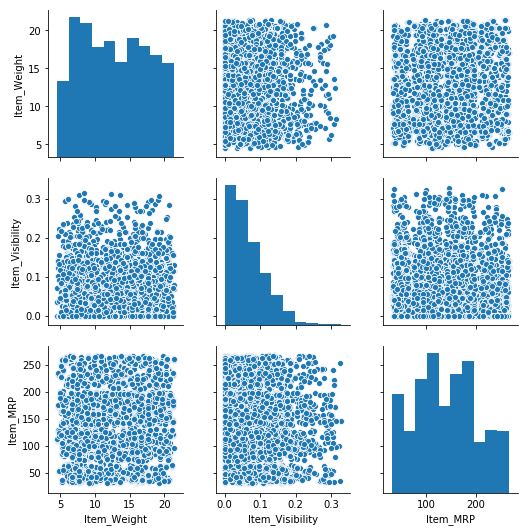

In [47]:
# pd.plotting.scatter_matrix(data[['Item_Weight', 'Item_Visibility', 'Item_MRP']], figsize=(8,8));
sns.pairplot(data[['Item_Weight', 'Item_Visibility', 'Item_MRP']]);

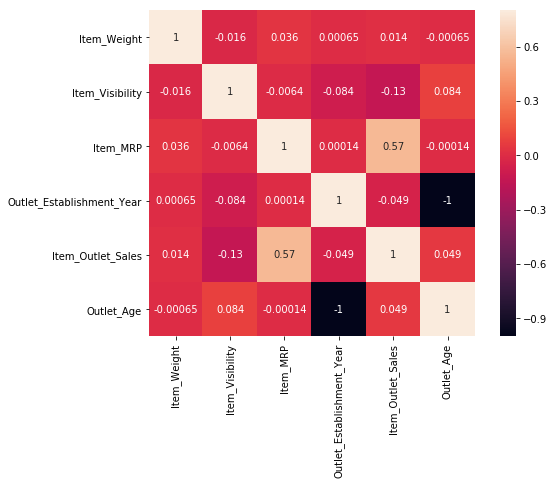

In [48]:
# matrix = data[['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']].corr()
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, annot=True);

We will make use of scatter plots for the numeric variables and violin plots for the categorical variables.

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li>Numerical</li><li>Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li>Target Vs Categorical</li><li>Numerical Vs Numerical</li><li style="font-weight: bold; color:blue;">Categorical Vs Categorical</li><li>Numerical Vs Categorical</li></ol> |

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

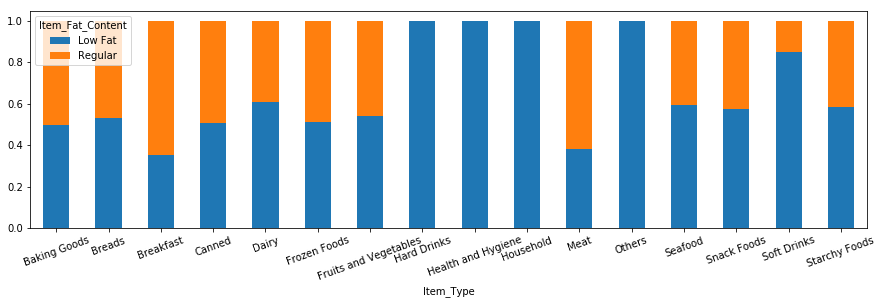

In [49]:
Item_Type=pd.crosstab(data['Item_Type'],data['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xticks(rotation=20)

In [50]:
categorical_comments.append('5 Item_Type are totally Low Fat items')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

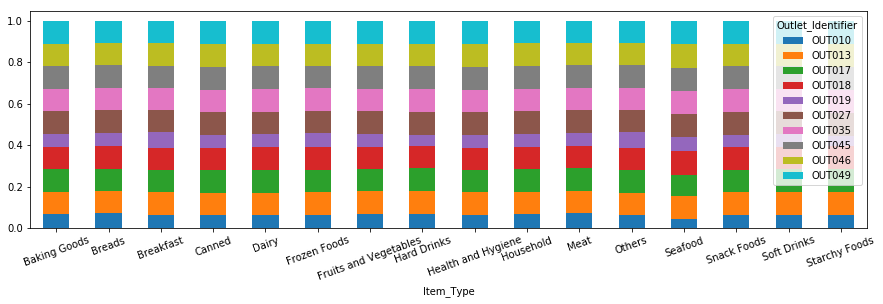

In [51]:
Item_Type_1=pd.crosstab(data['Item_Type'],data['Outlet_Identifier'])
Item_Type_1.div(Item_Type_1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

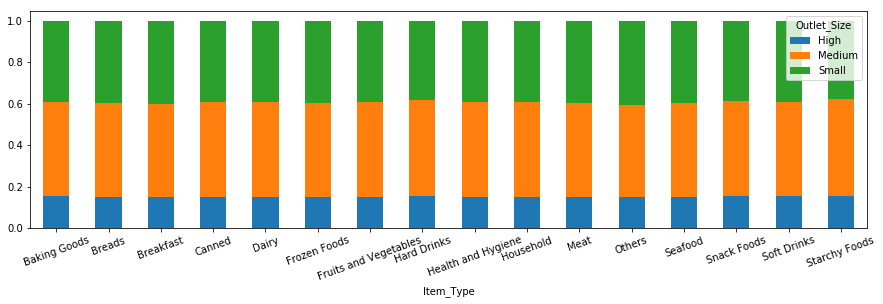

In [52]:
Item_Type_2=pd.crosstab(data['Item_Type'],data['Outlet_Size'])
Item_Type_2.div(Item_Type_2.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

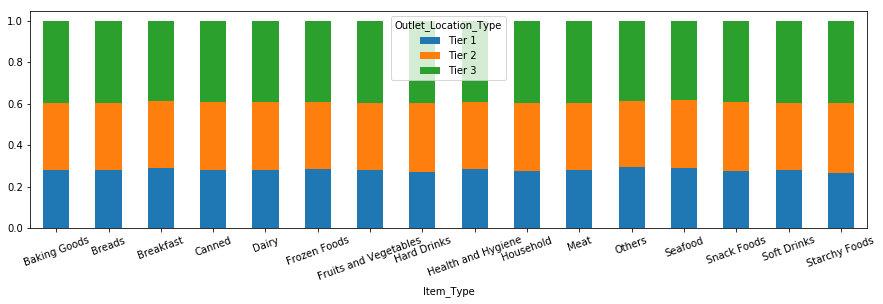

In [53]:
Item_Type_3=pd.crosstab(data['Item_Type'],data['Outlet_Location_Type'])
Item_Type_3.div(Item_Type_3.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xticks(rotation=20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

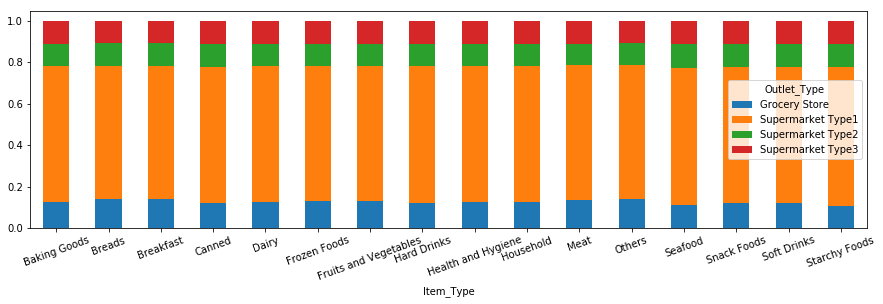

In [54]:
Item_Type_4=pd.crosstab(data['Item_Type'],data['Outlet_Type'])
Item_Type_4.div(Item_Type_4.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15,4))
plt.xticks(rotation=20)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

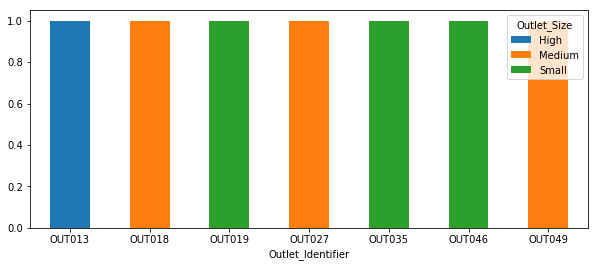

In [55]:
Outlet_Identifier=pd.crosstab(data['Outlet_Identifier'],data['Outlet_Size'])
Outlet_Identifier.div(Outlet_Identifier.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.xticks(rotation=0)

In [56]:
categorical_comments.append('An Outlet_Identifier has only one Outlet_Size..viz. \
OUT013 has only High, OUT018, OUT027, OUT049 have only Medium Outlet_Size')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

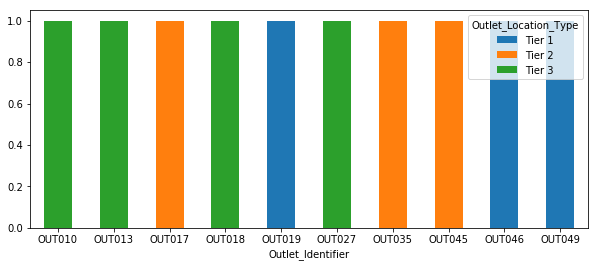

In [57]:
Outlet_Identifier_1=pd.crosstab(data['Outlet_Identifier'],data['Outlet_Location_Type'])
Outlet_Identifier_1.div(Outlet_Identifier_1.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.xticks(rotation=0)

In [58]:
categorical_comments.append('One Outlet_Identifier has only one Outlet_Location_Type')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

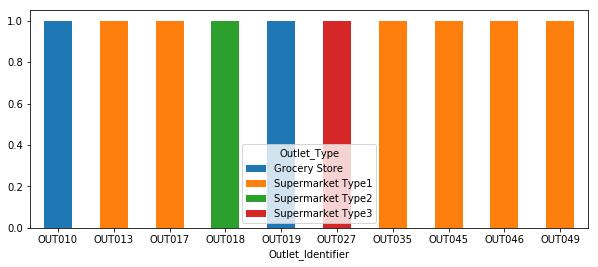

In [59]:
Outlet_Identifier_2=pd.crosstab(data['Outlet_Identifier'],data['Outlet_Type'])
Outlet_Identifier_2.div(Outlet_Identifier_2.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10,4))
plt.xticks(rotation=0)

In [60]:
categorical_comments.append('One Outlet_Identifier has only one Outlet_Type')

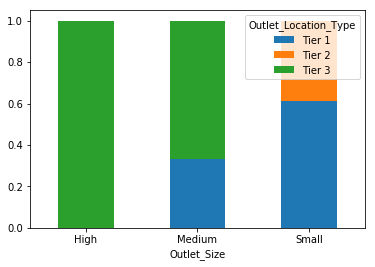

In [61]:
Outlet_Size=pd.crosstab(data['Outlet_Size'],data['Outlet_Location_Type'])
Outlet_Size.div(Outlet_Size.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xticks(rotation=0);

In [62]:
categorical_comments.append("Outlet_Size 'High' is in Tier 3 location, 'Medium' is in Tier 1 and tier 3 location, 'Small' is in Tier 2,3 location")

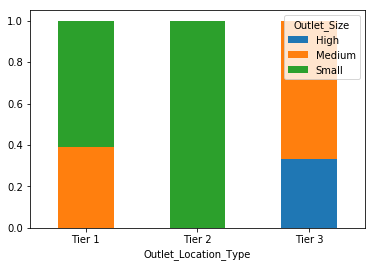

In [63]:
# Let's see vice versa ( Outlet_Location_Type on x-axis )
Outlet_Location_Type=pd.crosstab(data['Outlet_Location_Type'],data['Outlet_Size'])
Outlet_Location_Type.div(Outlet_Location_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xticks(rotation=0);

We can say Tier 1 location have Medium and Small Outlet_Size, Tier 2 location have only Small Outlet_Size. This sounds better than the above appended comment..easier and simpler. Never mind, we got the relation anyway.

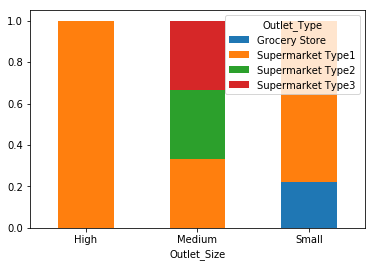

In [64]:
Outlet_Size=pd.crosstab(data['Outlet_Size'],data['Outlet_Type'])
Outlet_Size.div(Outlet_Size.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xticks(rotation=0);

In [65]:
categorical_comments.append('High outlet size have only Supermarket type 1. Grocery store is only ins small size outlets')

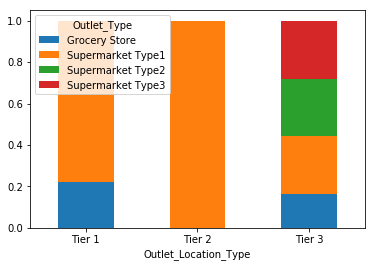

In [66]:
Outlet_Location_Type=pd.crosstab(data['Outlet_Location_Type'],data['Outlet_Type'])
Outlet_Location_Type.div(Outlet_Location_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6,4))
plt.xticks(rotation=0);

In [67]:
categorical_comments.append('Tier 2 location has only Sypermarket Type 1, Tire 1:Supermarket Type 1 & grocery store, Tier 3:all')

We will make use of scatter plots for the numeric variables and violin plots for the categorical variables.

| Univariate | Bivariate |
|-|-|
| <ol><li>Target</li><li>Numerical</li><li>Categorical</li></ol> | <ol><li>Target Vs Numerical</li><li>Target Vs Categorical</li><li>Numerical Vs Numerical</li><li>Categorical Vs Categorical</li><li style="font-weight: bold; color:blue;">Numerical Vs Categorical</li></ol> |

### All categorical Vs **Item_Weight**

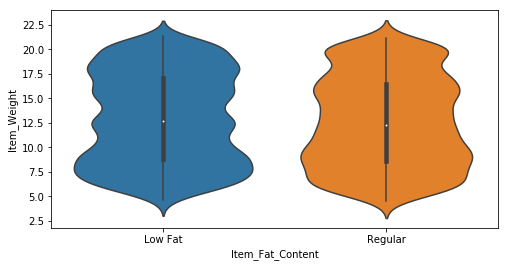

In [68]:
plt.figure(figsize=(8,4))
sns.violinplot(data["Item_Fat_Content"].fillna('--EMPTY--'), data["Item_Weight"]);

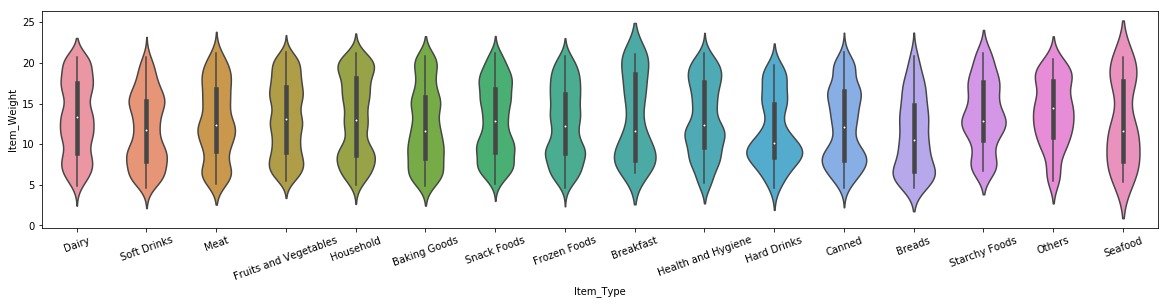

In [69]:
plt.figure(figsize=(20,4))
sns.violinplot(data["Item_Type"].fillna('--EMPTY--'), data["Item_Weight"])
plt.xticks(rotation=20);

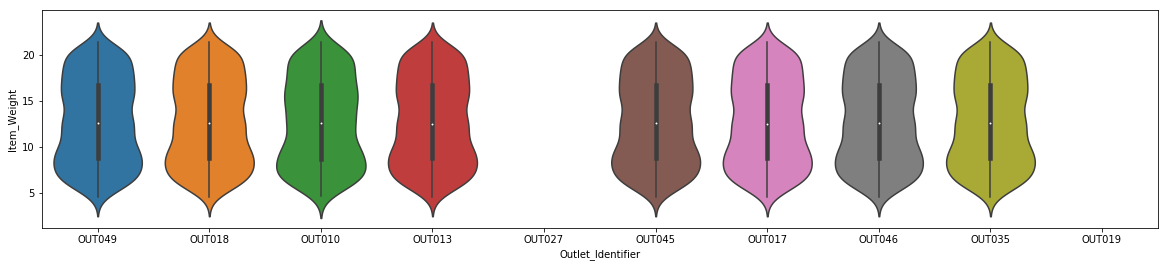

In [70]:
plt.figure(figsize=(20,4))
sns.violinplot(data["Outlet_Identifier"].fillna('--EMPTY--'), data["Item_Weight"]);

In [71]:
cat_num_comments.append('OUT027 and OUT019 have empty Item_Weight')

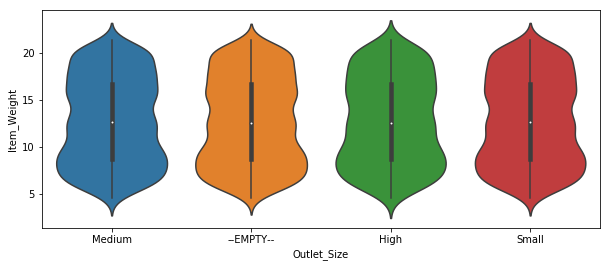

In [72]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Size"].fillna('--EMPTY--'), data["Item_Weight"]);

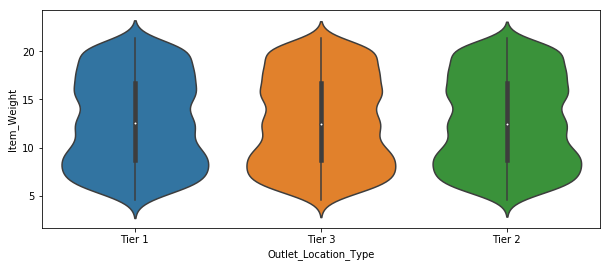

In [73]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Location_Type"].fillna('--EMPTY--'), data["Item_Weight"]);

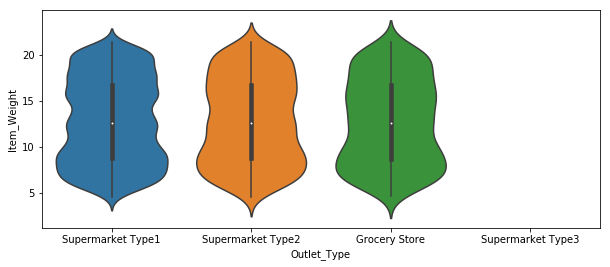

In [74]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Type"].fillna('--EMPTY--'), data["Item_Weight"]);

In [75]:
cat_num_comments.append('Supermarket Type 3 has missing values in Item_Weight')

### All categorical Vs **Item_Visibility**

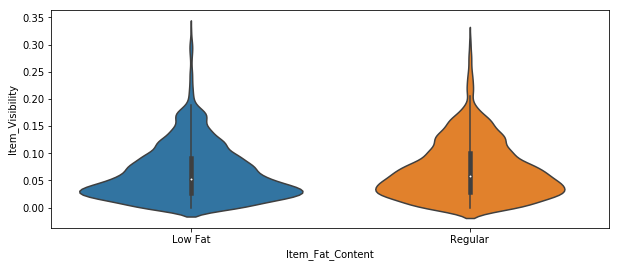

In [76]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Item_Fat_Content"].fillna('--EMPTY--'), data["Item_Visibility"]);

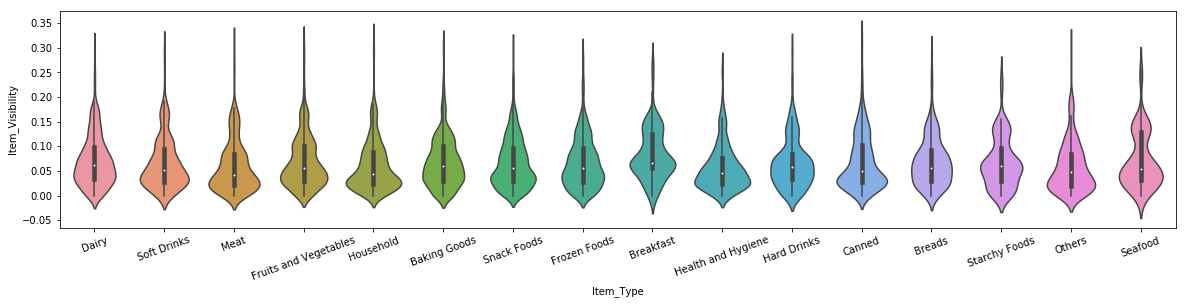

In [77]:
plt.figure(figsize=(20,4))
sns.violinplot(data["Item_Type"].fillna('--EMPTY--'), data["Item_Visibility"])
plt.xticks(rotation=20);

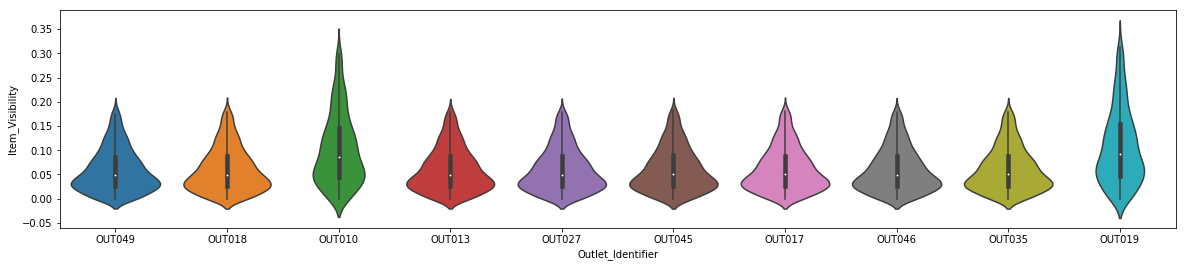

In [78]:
plt.figure(figsize=(20,4))
sns.violinplot(data["Outlet_Identifier"].fillna('--EMPTY--'), data["Item_Visibility"]);

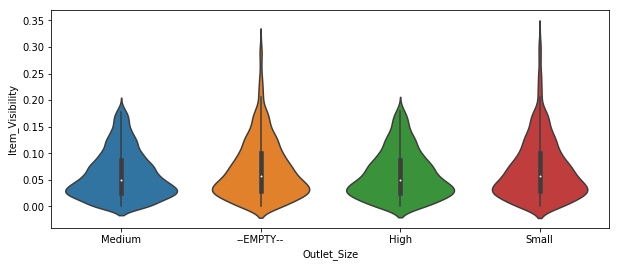

In [79]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Size"].fillna('--EMPTY--'), data["Item_Visibility"]);

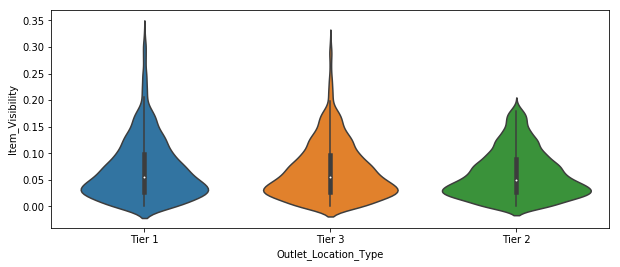

In [80]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Location_Type"].fillna('--EMPTY--'), data["Item_Visibility"]);

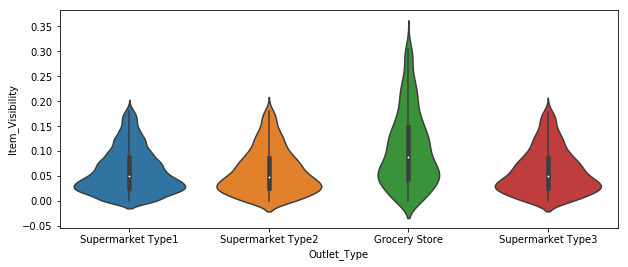

In [81]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Type"].fillna('--EMPTY--'), data["Item_Visibility"]);

### All categorical Vs **Item_MRP**

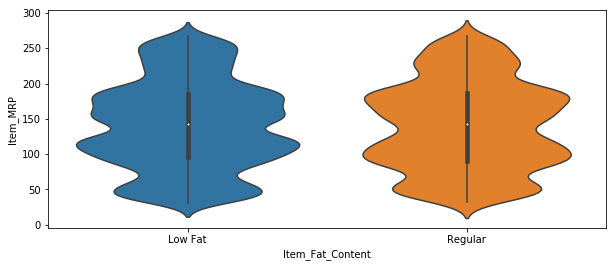

In [82]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Item_Fat_Content"].fillna('--EMPTY--'), data["Item_MRP"]);

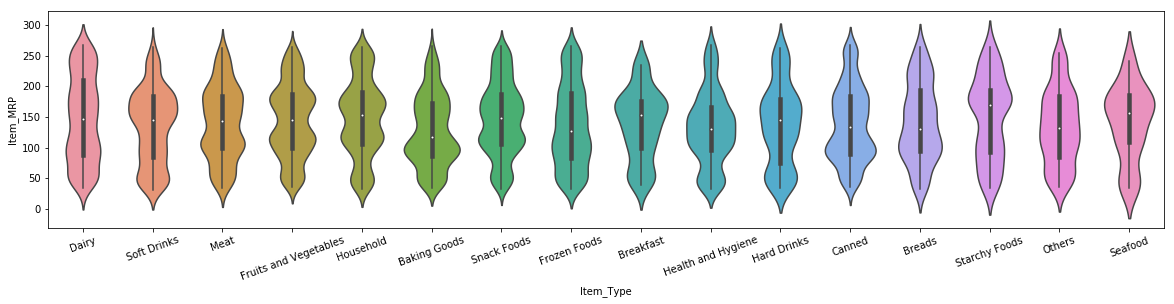

In [83]:
plt.figure(figsize=(20,4))
sns.violinplot(data["Item_Type"].fillna('--EMPTY--'), data["Item_MRP"])
plt.xticks(rotation=20);

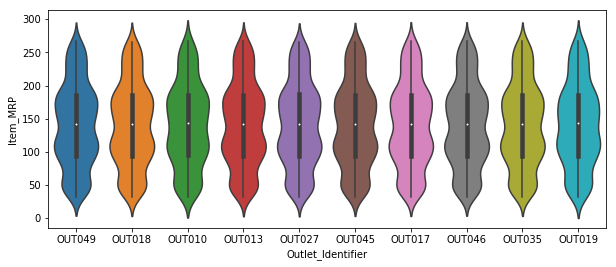

In [84]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Identifier"].fillna('--EMPTY--'), data["Item_MRP"]);

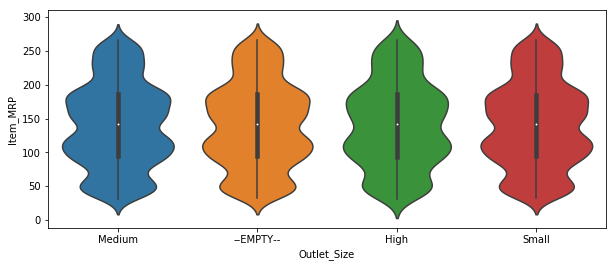

In [85]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Size"].fillna('--EMPTY--'), data["Item_MRP"]);

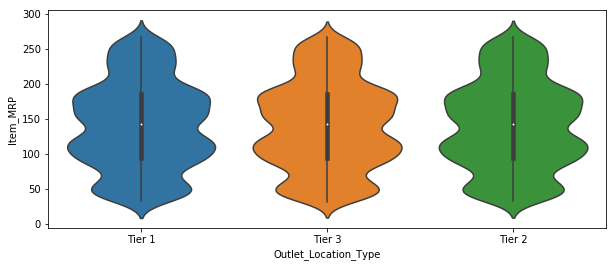

In [86]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Location_Type"].fillna('--EMPTY--'), data["Item_MRP"]);

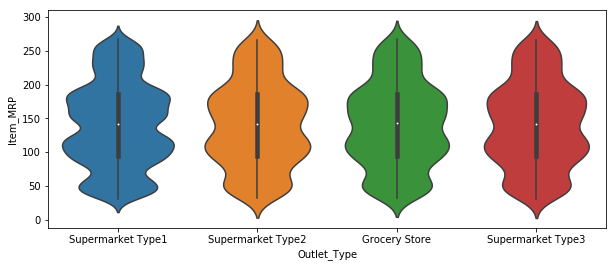

In [87]:
plt.figure(figsize=(10,4))
sns.violinplot(data["Outlet_Type"].fillna('--EMPTY--'), data["Item_MRP"]);

Let's see our missing values and comments.

In [88]:
count_missing(data)

,column_name,missing_count
1,Item_Weight,2439
8,Outlet_Size,4016
11,Item_Outlet_Sales,5681


In [89]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Age
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000,14204.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914,15.169319
std,4.652502,0.051459,62.086938,8.371664,1706.499616,8.371664
min,4.555000,0.000000,31.290000,1985.000000,33.290000,4.000000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400,9.000000
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000,14.000000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400,26.000000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800,28.000000


In [90]:
print_Comments()

--------------------------NUMERICAL COMMENTS--------------------------

['Item_Outlet_Sales has outliers. Needs transformation',
 'Some rows have Item_Visibility = 0 and outliers too. Both need work',
 'We see Item_MRP data roughly grouped into 4 bins',
 'Item_Weight has missing values',
 'The zero visibility items too have sales. This concern has been pointed out '
 'in numerical EDA ']

--------------------------CATEGORICAL COMMENTS--------------------------

['We may reduce no. of categories after complete EDA',
 'We may convert Outlet_Establishment_Year(1985-2002) into no. of years till '
 '2013',
 'Supermarket Type 1 has arbitrary high frequency in Outlet_Type',
 'Outlet_Size has missing values',
 'Outlet_Identifier OUT010 and OUT019 are moe spread near about 250,rest all '
 'have even distribution with Item_Output_Sales',
 "Empty values have same distribution as 'Small' has",
 '5 Item_Type are totally Low Fat items',
 'An Outlet_Identifier has only one Outlet_Size..viz. OUT013 ha

Let's build a model just by encoding.

In [91]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

- Conditions for Item_Weight = NaN:
 - Outlet_Identifier == 'OUT019', or
 - Outlet_Identifier == 'OUT027', or
 - Outlet_Type == 'Supermarket Type3', or
 - Outlet_Location_Type == 'Tier '1 with Outlet_Type == 'Grocery Store'

In [92]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [93]:
!python r_1.py

                       
RMSE_train  1130.890353
RMSE_test   1113.710188
RMSE_CV     1132.725186


Simple imputaion. Numerical imputation with mean and categorical imputation with mode :-

In [94]:
data_copy = data.copy()
data_copy['Item_Type_Combined'] = data_copy['Item_Identifier'].apply(lambda x: x[0:2])
data_copy.groupby(['Item_Type_Combined', 'Item_Type', 'Item_Fat_Content'])[[]].count()

Empty DataFrame
Columns: []
Index: [(DR, Dairy, Low Fat), (DR, Hard Drinks, Low Fat), (DR, Soft Drinks, Low Fat), (DR, Soft Drinks, Regular), (FD, Baking Goods, Low Fat), (FD, Baking Goods, Regular), (FD, Breads, Low Fat), (FD, Breads, Regular), (FD, Breakfast, Low Fat), (FD, Breakfast, Regular), (FD, Canned, Low Fat), (FD, Canned, Regular), (FD, Dairy, Low Fat), (FD, Dairy, Regular), (FD, Frozen Foods, Low Fat), (FD, Frozen Foods, Regular), (FD, Fruits and Vegetables, Low Fat), (FD, Fruits and Vegetables, Regular), (FD, Meat, Low Fat), (FD, Meat, Regular), (FD, Seafood, Low Fat), (FD, Seafood, Regular), (FD, Snack Foods, Low Fat), (FD, Snack Foods, Regular), (FD, Starchy Foods, Low Fat), (FD, Starchy Foods, Regular), (NC, Health and Hygiene, Low Fat), (NC, Household, Low Fat), (NC, Others, Low Fat)]

#### <b>MVT+FE Attempt : 2 

- Utilse Item_Identifier in the training data. Take first two letters from the string. FD-Food, DR-Drinks, NC-Non-Consumable.
- We see that NC(Non Consumable) also have fat content. We'll rename fat content for NC as "Non Edible".
- Impute Item_Weight with mean weight of each Item_Identifier's.
- Impute Outlet_Size with 'Small' as violin plot of empty and small size looks similar..almost same.
- Remove the column "Item_Type" & "Item_Identifier" as "Item_Type_Combibed" is taking care of this.

In [95]:
!python r_2.py

                       
RMSE_train  1131.495338
RMSE_test   1112.013807
RMSE_CV     1129.968667


### MVT+FE Attempt :3

Let's scale the numeric features

`scaler = StandardScaler()`

`data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']] = scaler.fit_transform(data[['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Age']])`

In [96]:
!python r_3.py

                       
RMSE_train  1131.735839
RMSE_test   1111.979519
RMSE_CV     1130.854114


### MVT+FE Attempt :4

'Item_Visibility' has minimum value of 0, which makes no practical sense. Lets consider it like missing information and impute it with mean visibility of that produc

`
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)`

`
data['Item_Visibility'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))`

`
print(data['Item_Visibility'].isnull().sum())`


In [97]:
!python r_4.py

                       
RMSE_train  1131.946937
RMSE_test   1111.542254
RMSE_CV     1130.362031


### MVT+FE Attempt : 5

"Item_MRP" was roughly divided into 4 bins

`data.loc[ data['Item_MRP'] <= 68, 'Item_MRP'] = 0`

`data.loc[(data['Item_MRP'] > 68) & (data['Item_MRP'] <= 130), 'Item_MRP'] = 1`

`data.loc[(data['Item_MRP'] > 130) & (data['AItem_MRPge'] <= 200), 'Item_MRP'] = 2`

`data.loc[ data['Item_MRP'] > 200, 'Item_MRP'] = 3`

Make sure it is included in scaling statement

In [98]:
!python r_5.py

                       
RMSE_train  1131.946937
RMSE_test   1111.542254
RMSE_CV     1130.362031
Figure(640x480)


#### Binning turns out to be a bad idea. So we'll remove binning.
The coefficients are of the order e16.
Let's try Ridge Regression and Lasso Regression

In [99]:
!python r_6.py

---------- Ridge ----------                        
RMSE_train  1131.584271
RMSE_test   1112.010978
RMSE_CV     1129.934323
Figure(640x480)
---------- Lasso ----------                        
RMSE_train  1120.482814
RMSE_test   1155.541427
RMSE_CV     1129.855010
Figure(640x480)


With Ridge and Lasso, coefficients have improved but still these are large values.<br>
Let's try Decision Tree with 3 different specifications.

`models = [DecisionTreeRegressor(), DecisionTreeRegressor(max_depth=15, min_samples_leaf=100), DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)]`

In [100]:
!python r_7.py

---------- DecisionTreeRegressor ----------                        
RMSE_train     0.000000
RMSE_test   1522.039673
RMSE_CV     1552.233023
Figure(640x480)
---------- DecisionTreeRegressor ----------                        
RMSE_train  1058.600799
RMSE_test   1098.288496
RMSE_CV     1095.968038
Figure(640x480)
---------- DecisionTreeRegressor ----------                        
RMSE_train  1072.469433
RMSE_test   1094.578056
RMSE_CV     1100.029098
Figure(640x480)


We see that second Decision Tree gives best of three and better than Ridge. Let's try RandomForestRegressor()

In [101]:
!python r_8.py

/home/petrichor/DS/V_enV/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
---------- RandomForestRegressor ----------                        
RMSE_train   493.688173
RMSE_test   1152.328018
RMSE_CV     1180.162901
Figure(640x480)
---------- RandomForestRegressor ----------                        
RMSE_train  1070.303673
RMSE_test   1100.223732
RMSE_CV     1089.188435
Figure(640x480)
---------- RandomForestRegressor ----------                        
RMSE_train  1072.991763
RMSE_test   1067.837227
RMSE_CV     1088.589896
Figure(640x480)


### Let's try <b>xgboost

### 1.) Fitting using <b>learning API ( xgb.train ( ) )</b>

In [102]:
!python r_9.py

[0]	eval-rmse:2476.3	train-rmse:2550
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 50 rounds.
[1]	eval-rmse:2304.49	train-rmse:2376.22
[2]	eval-rmse:2122.35	train-rmse:2191.72
[3]	eval-rmse:1963.03	train-rmse:2029.79
[4]	eval-rmse:1851.17	train-rmse:1913.93
[5]	eval-rmse:1724.58	train-rmse:1784.7
[6]	eval-rmse:1615.62	train-rmse:1672.21
[7]	eval-rmse:1523.55	train-rmse:1575.13
[8]	eval-rmse:1443.57	train-rmse:1491.98
[9]	eval-rmse:1374.44	train-rmse:1420
[10]	eval-rmse:1318.4	train-rmse:1358.87
[11]	eval-rmse:1271.78	train-rmse:1308.34
[12]	eval-rmse:1232.57	train-rmse:1265
[13]	eval-rmse:1198.88	train-rmse:1228.39
[14]	eval-rmse:1171.61	train-rmse:1198.35
[15]	eval-rmse:1149.07	train-rmse:1172.81
[16]	eval-rmse:1130.26	train-rmse:1151.56
[17]	eval-rmse:1114.54	train-rmse:1133.33
[18]	eval-rmse:1102.74	train-rmse:1118.95
[19]	eval-rmse:1093.26	train-rmse:1106.08
[20]	eval-rmse:1085.6	train-rmse:1093

```python
xgboost.train(params, dtrain, num_boost_round=10, evals=(), obj=None, feval=None, maximize=False, \
           early_stopping_rounds=None, evals_result=None, verbose_eval=True, xgb_model=None, \
           callbacks=None, learning_rates=None)
```
```python
xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', \
             booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, \
             subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, \
             scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, \
             importance_type='gain', **kwargs)
```
```python
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, \
           metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, \
           fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)
```

### 2.) Cross Validation using <b>learning API ( xgb.cv ( ) )</b>

In [103]:
!python r_10.py

    test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
0      2537.715820      51.830827      2537.277832       11.760231
1      2340.369531      65.516307      2338.604883        5.487040
2      2165.083740      66.772044      2162.202002        8.772133
3      2011.110596      64.678511      2006.612622       10.899972
4      1881.887280      65.455182      1876.389404       22.550820
5      1764.558423      67.534359      1757.525952       27.755321
6      1662.320386      69.824785      1653.017774       21.673604
7      1569.242578      67.052931      1558.426392       18.834175
8      1493.246753      62.527352      1480.942163       20.273152
9      1426.162329      56.917182      1412.932373       16.203927
10     1370.381323      54.162749      1355.393555       18.601283
11     1324.611328      55.197407      1307.565381       13.459758
12     1283.023730      52.387096      1263.707495       11.154478
13     1250.149048      54.116578      1228.491016        8.74

### 3.) Fitting using <b>sk-learn wrapper ( xgb.XGBRegressor ( ) )</b>

In [111]:
!python r_11.py

[0]	validation_0-rmse:2476.3
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:2304.49
[2]	validation_0-rmse:2122.35
[3]	validation_0-rmse:1963.03
[4]	validation_0-rmse:1851.17
[5]	validation_0-rmse:1724.58
[6]	validation_0-rmse:1615.62
[7]	validation_0-rmse:1523.55
[8]	validation_0-rmse:1443.57
[9]	validation_0-rmse:1374.44
[10]	validation_0-rmse:1318.4
[11]	validation_0-rmse:1271.78
[12]	validation_0-rmse:1232.57
[13]	validation_0-rmse:1198.88
[14]	validation_0-rmse:1171.61
[15]	validation_0-rmse:1149.07
[16]	validation_0-rmse:1130.26
[17]	validation_0-rmse:1114.54
[18]	validation_0-rmse:1102.74
[19]	validation_0-rmse:1093.26
[20]	validation_0-rmse:1085.6
[21]	validation_0-rmse:1079.51
[22]	validation_0-rmse:1074.71
[23]	validation_0-rmse:1070.41
[24]	validation_0-rmse:1066.69
[25]	validation_0-rmse:1064.62
[26]	validation_0-rmse:1062.82
[27]	validation_0-rmse:1062
[28]	validation_0-rmse:1060.15
[29]	validation_0-rmse:1061.31
[30]	validation_0-rmse

### 4.) <b>GridSearchCV</b> using sk-learn

0. As we got n_estimators = 36, we'll fix it and **learning_rate = 0.1** too to perform GSCV to **tune max_depth** and **min_child_weight**

1. Perform CV to find n_estimators by using **early_stopping_rounds** using large n_estimator value.
2. Fix n_estimators & **learning_rate** to perform GSCV to tune **max_depth** & **min_child_weight**.
3. Use all previously tuned and then tune **gamma**
4. Repeat step 1 and tune **sub_sample** & **colsample_bytree** using updated n_estimators and all updated parameters.
5. Tune **reg_alpha**.
6. Repeat step 1 to tune **learning_rate**.


In [1]:
!python r_12.py

{'std_fit_time': array([0.07355829, 0.16156518, 0.13146513, 0.06242857, 0.06968306,
       0.10656615, 0.15618304, 0.08460468, 0.1019888 , 0.12383029,
       0.15494573, 1.10189585]), 'split0_train_score': array([-964269.80051779, -966075.61261184, -971953.42164086,
       -674288.68064787, -696326.57582924, -724259.01861109,
       -363630.91964888, -408372.44572402, -454636.63096079,
       -148145.55166033, -187320.59643602, -258464.52147321]), 'mean_score_time': array([0.02746792, 0.02634592, 0.02535295, 0.03793468, 0.03725419,
       0.0365396 , 0.06009259, 0.06007638, 0.0567204 , 0.09516931,
       0.09292631, 0.0849329 ]), 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object), 'std_train_score': array([ 4900.28501154,  6673.358306  ,  7243.25620458,  6930.32622024,
        8507.7281

Let's copy the code from r_12.py and rerun it in here. [ Separate the CV and GSCV codes ]

In [1]:
import pandas as pd
import numpy as np
np.random.seed(24)
import matplotlib.pyplot as plt
import os, math
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

os.chdir('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/')
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')
submission = pd.read_csv('SampleSubmission_TmnO39y.csv')

# comibne train and test data
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)

# MVT
data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
data['Outlet_Size'] = data['Outlet_Size'].fillna('Small')

# MVT + FE
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)
data['Item_Visibility'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

# FE
# Get the first two characters of ID:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(
    {
        'low fat': 'Low Fat',
        'LF':'Low Fat',
        'reg':'Regular'})

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data = data.drop(['Item_Type','Item_Identifier','Outlet_Establishment_Year'],1)

# EN
data = pd.get_dummies(data, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Identifier','Outlet_Size',
'Outlet_Location_Type','Outlet_Type'])

# SCALE
# for col in data.select_dtypes(include=[np.int]).columns:
#     data[col] = data[col].astype(float)

# scaler = StandardScaler()
# data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']] = scaler.fit_transform(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])

# segregate training and test data
data_train = data.loc[data.source=='train']
data_test = data.loc[data.source=='test']

target='Item_Outlet_Sales'
predictors = [x for x in data_train.columns if x not in [target]+['source']]

X = data_train[predictors]
y = data_train[target]

#### **CV to get n_estimators**

In [2]:
# use CV to find n_estimators while fixing learning_rate(eta) = 0.1
dtrain = xgb.DMatrix(X.values, label=y.values)
param = {'max_depth':5, 'eta':0.1, 'silent':1, 'objective':'reg:linear', 'colsample_bytree':0.8, 'min_child_weight':1, 'gamma':0, 'subsample':0.8, 'scale_pos_weight':1}
cv_score = xgb.cv(param, dtrain, num_boost_round=200, nfold=5, metrics='rmse', early_stopping_rounds=5, verbose_eval=None)

In [3]:
# get n_estimators from cv_score
lr = 0.1
nbr = cv_score.shape[0]
print('N_ESTIMATORS :', nbr)

N_ESTIMATORS : 40


### GSCV

In [4]:
# ------------  GRID SEARCH  ------------
grid = {
    'max_depth':range(3,10,2),#need not be included in xgb.XGBRegressor()
    'min_child_weight':range(1,6,2)#need not be included in xgb.XGBRegressor()
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, silent=1, objective='reg:linear', colsample_bytree=0.8, gamma=0, subsample=0.8, scale_pos_weight=1)

# Make RMSE scorer
def RMSE(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return rmse
scorer = make_scorer(RMSE, greater_is_better=False)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=40,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring=make_scorer(RMSE, greater_is_better=False), verbose=0)

In [5]:
gs.cv_results_, gs.best_params_, gs.best_score_

({'mean_fit_time': array([0.74101586, 0.90310879, 0.90838504, 1.09915314, 1.30016904,
         1.57353292, 1.94715309, 1.70052953, 1.5414834 , 1.96735883,
         2.08857718, 1.79336305]),
  'mean_score_time': array([0.01620836, 0.01646538, 0.01133885, 0.01456552, 0.01773505,
         0.02214003, 0.01653037, 0.01530371, 0.01567125, 0.02417502,
         0.02321944, 0.01585708]),
  'mean_test_score': array([-1082.246208  , -1082.44014932, -1082.04256882, -1086.87953388,
         -1086.5309466 , -1086.90460391, -1101.42360976, -1097.56562133,
         -1096.62166692, -1120.04670555, -1118.06127579, -1116.22957178]),
  'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
               mask=[False, False, False, False, False, False, False, False,
                     False, False, False, False],
         fill_value='?',
              dtype=object),
  'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
               mask=[False, False, F

<b>Let's optimize these 2 parameters again

In [7]:
# ------------  GRID SEARCH  ------------
grid = {
    'max_depth':[2,3,4],#need not be included in xgb.XGBRegressor()
    'min_child_weight':[4,5,6]#need not be included in xgb.XGBRegressor()
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, silent=1, objective='reg:linear', colsample_bytree=0.8, gamma=0, subsample=0.8, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'max_depth': 3, 'min_child_weight': 6}, -1081.9338715446604)

<b>max_depth is tuned to 3, let's tune min_child_weight for 6,7,8. Remove max_depth from grid and put max_depth=3 in xgb.XGBRegressor()

In [8]:
# ------------  GRID SEARCH  ------------
grid = {
    'min_child_weight':[6,7,8]#need not be included in xgb.XGBRegressor()
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, silent=1, objective='reg:linear', colsample_bytree=0.8, gamma=0, subsample=0.8, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'min_child_weight': 7}, -1081.540938937977)

<b>Tuned :-
    - max_depth=3
    - min_child_weight=7
Now tune **gamma**. [include **min_child_weight** in xgb.XGBRegressor()]

In [9]:
# ------------  GRID SEARCH  ------------
grid = {
    'gamma':[0.0, 0.1, 0.2]#need not be included in xgb.XGBRegressor()
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', colsample_bytree=0.8, gamma=0, subsample=0.8, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'gamma': 0.0}, -1081.540938937977)

<b>Tuned :-
    - max_depth=3
    - min_child_weight=7
    - gamma=0
Now perform xgb.cv() to find **n_estimators**

In [10]:
dtrain = xgb.DMatrix(X.values, label=y.values)
param = {'max_depth':3, 'eta':0.1, 'silent':1, 'objective':'reg:linear', 'colsample_bytree':0.8, 'min_child_weight':7, 'gamma':0, 'subsample':0.8, 'scale_pos_weight':1}
cv_score = xgb.cv(param, dtrain, num_boost_round=200, nfold=5, metrics='rmse', early_stopping_rounds=5, verbose_eval=None)

nbr = cv_score.shape[0]
print('N_ESTIMATORS :', nbr)

N_ESTIMATORS : 49


<b>Tuned :-
    - max_depth=3
    - min_child_weight=7
    - gamma=0
Now tune **subsample** & **colsample_bytree**

In [11]:
# ------------  GRID SEARCH  ------------
grid = {
    'subsample':[0.7, 0.8, 0.9],
    'colsample_bytree':[0.7, 0.8, 0.9]
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, -1080.0374130374282)

Retune

In [12]:
# ------------  GRID SEARCH  ------------
grid = {
    'subsample':[0.5, 0.6, 0.7],
    'colsample_bytree':[0.9, 1.0]
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'colsample_bytree': 0.9, 'subsample': 0.7}, -1080.0374130374282)

<b>Tuned :-
    - max_depth=3
    - min_child_weight=7
    - gamma=0
    - subsample=0.7
    - colsample_bytree=0.9
Now tune **Regularization parameters [reg_alpha(L1) & reg_lambda(L2)]**

In [13]:
# ------------  GRID SEARCH  ------------
grid = {
    'reg_alpha':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0],
    'reg_lambda':[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0]
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'reg_alpha': 10.0, 'reg_lambda': 1.0}, -1079.6460331987807)

<b>Tuned :-
    - max_depth=3
    - min_child_weight=7
    - gamma=0
    - subsample=0.7
    - colsample_bytree=0.9
    - reg_lambda=1.0
Now tune **reg_alpha(L1)**

In [14]:
# ------------  GRID SEARCH  ------------
grid = {
    'reg_alpha':[10.0, 20.0, 40.0, 60.0]
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, \
                         reg_lambda=1.0, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'reg_alpha': 60.0}, -1079.5807814710192)

retune reg_alpha

In [15]:
# ------------  GRID SEARCH  ------------
grid = {
    'reg_alpha':[60.0, 100, 150, 200]
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, \
                         reg_lambda=1.0, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'reg_alpha': 60.0}, -1079.5807814710192)

retunr reg_alpha

In [16]:
# ------------  GRID SEARCH  ------------
grid = {
    'reg_alpha':[60.0, 70, 80, 85, 90]
}

model = xgb.XGBRegressor(n_estimators=nbr, learning_rate=lr, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, \
                         reg_lambda=1.0, scale_pos_weight=1)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_

({'reg_alpha': 80}, -1079.4215898031584)

<b>Tuned :-
    - max_depth=3
    - min_child_weight=7
    - gamma=0
    - subsample=0.7
    - colsample_bytree=0.9
    - reg_lambda=1.0
    - reg_alpha=80
Now, apply xgb.cv() to get n_estimators using lesser learning rate

In [18]:
dtrain = xgb.DMatrix(X.values, label=y.values)
param = {'max_depth':3, 'eta':0.01, 'silent':1, 'objective':'reg:linear', 'colsample_bytree':0.9, 'min_child_weight':7, 'gamma':0, 'subsample':0.7, 'scale_pos_weight':1, \
        'alpha':80, 'lambda':1.0}
cv_score = xgb.cv(param, dtrain, num_boost_round=700, nfold=5, metrics='rmse', early_stopping_rounds=5, verbose_eval=None)

nbr = cv_score.shape[0]
print('N_ESTIMATORS :', nbr)

N_ESTIMATORS : 435


So, along with above tuned parameters, n_estimators=435 and learning_rate=0.01 give us the optimised model<br>
<b>Tuned :-
    - n_estimators=435
    - learning_rate=0.01
    - max_depth=3
    - min_child_weight=7
    - gamma=0
    - subsample=0.7
    - colsample_bytree=0.9
    - reg_lambda=1.0
    - reg_alpha=80
    
Train on whole training data and predict on test data and submit

In [19]:
model = xgb.XGBRegressor(n_estimators=435, learning_rate=0.01, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, \
                         reg_lambda=1.0, scale_pos_weight=1)
model.fit(data_train[predictors], data_train[target])

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=7, missing=None, n_estimators=435,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, seed=None,
       silent=1, subsample=0.7)

In [27]:
pred_test = model.predict(data_test[predictors])
submission_data = {"Item_Identifier": test["Item_Identifier"],
     "Outlet_Identifier": test["Outlet_Identifier"],
     "Item_Outlet_Sales": pred_test}
submission = pd.DataFrame(submission_data)
submission.to_csv('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/submission_1.csv', index=False)

### Gives LBS of 1155.0643801674. Let's impute Outlet_Size with its mode per Outlet_Type

In [37]:
import pandas as pd
import numpy as np
np.random.seed(24)
import matplotlib.pyplot as plt
import os, math
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

os.chdir('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/')
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')
submission = pd.read_csv('SampleSubmission_TmnO39y.csv')

# comibne train and test data
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)

# MVT
data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
# data['Outlet_Size'] = data['Outlet_Size'].fillna('Small')
data['Outlet_Size'] = data.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

# MVT + FE
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)
data['Item_Visibility'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

# FE
# Get the first two characters of ID:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(
    {
        'low fat': 'Low Fat',
        'LF':'Low Fat',
        'reg':'Regular'})

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data = data.drop(['Item_Type','Item_Identifier','Outlet_Establishment_Year'],1)

# EN
data = pd.get_dummies(data, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Identifier','Outlet_Size',
'Outlet_Location_Type','Outlet_Type'])

# SCALE
# for col in data.select_dtypes(include=[np.int]).columns:
#     data[col] = data[col].astype(float)

# scaler = StandardScaler()
# data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']] = scaler.fit_transform(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])

# segregate training and test data
data_train = data.loc[data.source=='train']
data_test = data.loc[data.source=='test']

target='Item_Outlet_Sales'
predictors = [x for x in data_train.columns if x not in [target]+['source']]

X = data_train[predictors]
y = data_train[target]

model = xgb.XGBRegressor(n_estimators=435, learning_rate=0.01, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, \
                         reg_lambda=1.0, scale_pos_weight=1)
model.fit(data_train[predictors], data_train[target])

pred_test = model.predict(data_test[predictors])
submission_data = {"Item_Identifier": test["Item_Identifier"],
     "Outlet_Identifier": test["Outlet_Identifier"],
     "Item_Outlet_Sales": pred_test}
submission = pd.DataFrame(submission_data, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
submission.to_csv('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/submission_1.csv', index=False)

LBS = 1155.0643801674. No improvement.
- Create a new feature 'Item_Visibility_Ratio' = Item_Visibility/(avg. visibility per identifier)
- Remove Otlet_Identifier too

In [12]:
import pandas as pd
import numpy as np
np.random.seed(24)
import matplotlib.pyplot as plt
import os, math
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

os.chdir('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/')
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')
submission = pd.read_csv('SampleSubmission_TmnO39y.csv')

# comibne train and test data
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)

# MVT
data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
# data['Outlet_Size'] = data['Outlet_Size'].fillna('Small')
data['Outlet_Size'] = data.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

# MVT + FE
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)
data['Item_Visibility'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

data['Item_Visibility_Mean'] = 0
data['Item_Visibility_Mean'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))
data['Item_Visibility_Mean_Ratio'] = data['Item_Visibility']/data['Item_Visibility_Mean']
data = data.drop('Item_Visibility_Mean', 1)

# FE
# Get the first two characters of ID:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(
    {
        'low fat': 'Low Fat',
        'LF':'Low Fat',
        'reg':'Regular'})

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data = data.drop(['Item_Type','Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'],1)

# EN
data = pd.get_dummies(data, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Size',
'Outlet_Location_Type','Outlet_Type'])

# SCALE
# for col in data.select_dtypes(include=[np.int]).columns:
#     data[col] = data[col].astype(float)

# scaler = StandardScaler()
# data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']] = scaler.fit_transform(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])

# segregate training and test data
data_train = data.loc[data.source=='train']
data_test = data.loc[data.source=='test']

target='Item_Outlet_Sales'
predictors = [x for x in data_train.columns if x not in [target]+['source']]

X = data_train[predictors]
y = data_train[target]

model = xgb.XGBRegressor(n_estimators=435, learning_rate=0.01, max_depth=3, min_child_weight=7, silent=1, objective='reg:linear', gamma=0, subsample=0.7, colsample_bytree=0.9, \
                         reg_lambda=1.0, scale_pos_weight=1)
model.fit(data_train[predictors], data_train[target])

pred_test = model.predict(data_test[predictors])
submission_data = {"Item_Identifier": test["Item_Identifier"],
     "Outlet_Identifier": test["Outlet_Identifier"],
     "Item_Outlet_Sales": pred_test}
submission = pd.DataFrame(submission_data, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
submission.to_csv('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/submission_1.csv', index=False)

 LBS = 1153.8699768934102.

### GSCV with Random Forest

In [3]:
import pandas as pd
import numpy as np
np.random.seed(24)
import matplotlib.pyplot as plt
import os, math
from pprint import pprint
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler

os.chdir('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/')
train = pd.read_csv('Train_UWu5bXk.csv')
test = pd.read_csv('Test_u94Q5KV.csv')
submission = pd.read_csv('SampleSubmission_TmnO39y.csv')

# comibne train and test data
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True, sort=False)

# MVT
data['Item_Weight'] = data.groupby(['Item_Identifier'])['Item_Weight'].transform(lambda x: x.fillna(x.mean()))
# data['Outlet_Size'] = data['Outlet_Size'].fillna('Small')
data['Outlet_Size'] = data.groupby(['Outlet_Type'])['Outlet_Size'].transform(lambda x: x.fillna(x.mode()[0]))

# MVT + FE
data['Item_Visibility'] = data['Item_Visibility'].replace(0, np.nan)
data['Item_Visibility'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))

data['Item_Visibility_Mean'] = 0
data['Item_Visibility_Mean'] = data.groupby(['Item_Identifier'])['Item_Visibility'].transform(lambda x: x.fillna(x.mean()))
data['Item_Visibility_Mean_Ratio'] = data['Item_Visibility']/data['Item_Visibility_Mean']
data = data.drop('Item_Visibility_Mean', 1)

# FE
# Get the first two characters of ID:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace(
    {
        'low fat': 'Low Fat',
        'LF':'Low Fat',
        'reg':'Regular'})

data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Outlet_Age'] = 2013 - data['Outlet_Establishment_Year']
data = data.drop(['Item_Type','Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'],1)

# EN
data = pd.get_dummies(data, columns=['Item_Fat_Content','Item_Type_Combined','Outlet_Size',
'Outlet_Location_Type','Outlet_Type'])

# SCALE
# for col in data.select_dtypes(include=[np.int]).columns:
#     data[col] = data[col].astype(float)

# scaler = StandardScaler()
# data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']] = scaler.fit_transform(data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Age']])

# segregate training and test data
data_train = data.loc[data.source=='train']
data_test = data.loc[data.source=='test']

target='Item_Outlet_Sales'
predictors = [x for x in data_train.columns if x not in [target]+['source']]

X = data_train[predictors]
y = data_train[target]

In [9]:
# ------------  GRID SEARCH  ------------
grid = {'n_estimators': [20,30],
        'max_features': [8,10],
        'max_depth': [4,6,8],
        'min_samples_split': [0.3,0.4,0.5],
        'min_samples_leaf': [0.1,0.2],
        'bootstrap': [True, False]}

model = RandomForestRegressor()

# Make RMSE scorer
def RMSE(y_true, y_pred):
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    return rmse
scorer = make_scorer(RMSE, greater_is_better=False)

gs = GridSearchCV(estimator=model, param_grid=grid, scoring=scorer, n_jobs=4, iid=False, cv=5, return_train_score=False)

gs.fit(X,y)
gs.best_params_, gs.best_score_, gs.best_estimator_

model =  gs.best_estimator_

model.fit(data_train[predictors], data_train[target])

pred_test = model.predict(data_test[predictors])
submission_data = {"Item_Identifier": test["Item_Identifier"],
     "Outlet_Identifier": test["Outlet_Identifier"],
     "Item_Outlet_Sales": np.sqrt(pred_test)}
submission = pd.DataFrame(submission_data, columns=['Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
submission.to_csv('/home/petrichor/DS/Analytics_Vidhya_24_projects/3_Bigmart_Sales/submission_1.csv', index=False)

({'bootstrap': False,
  'max_depth': 4,
  'max_features': 10,
  'min_samples_leaf': 0.1,
  'min_samples_split': 0.3,
  'n_estimators': 30},
 -1251.3581984921216,
 RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=4,
            max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=0.1,
            min_samples_split=0.3, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))

LBS ~ 2600
So we'll stick to xgboost solution